# Introduction to Machine learning: Exercises 

The following cells provide an illustrative solution to  / my personal exploration of the exercises of the Notebook [Introduction_ML.ipynb](Introduction_ML.ipynb). 

## Exploration of the iris data set 

- How would you proceed to find out the meaning of the dictionnary keys? 
- How many samples does contain the data table? How many features? 
- How do you interpret the shape of the target label 
- Visualise some of the datasets pairs

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# We see the DESCR keyword ... this might be a description of the data set 
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# There is also the help of the function provides a brief description of the main keys
help(load_iris)

Help on function load_iris in module sklearn.datasets._base:

load_iris(*, return_X_y=False, as_frame=False)
    Load and return the iris dataset (classification).
    
    The iris dataset is a classic and very easy multi-class classification
    dataset.
    
    =================   ==============
    Classes                          3
    Samples per class               50
    Samples total                  150
    Dimensionality                   4
    Features            real, positive
    =================   ==============
    
    Read more in the :ref:`User Guide <iris_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object. See
        below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    as_frame : bool, default=False
        If True, the data is a pandas DataFrame including columns with
        appropriate dtypes (numeric). 

In [5]:
# To find out the sample size of the data 
#iris.data.shape
print(iris['data'].shape)

(150, 4)


This confirms that we have 150 samples with 4 features for each sample. 

In [6]:
# Target labels and names 
print(iris.target, iris.target_names, iris.target.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] ['setosa' 'versicolor' 'virginica'] (150,)


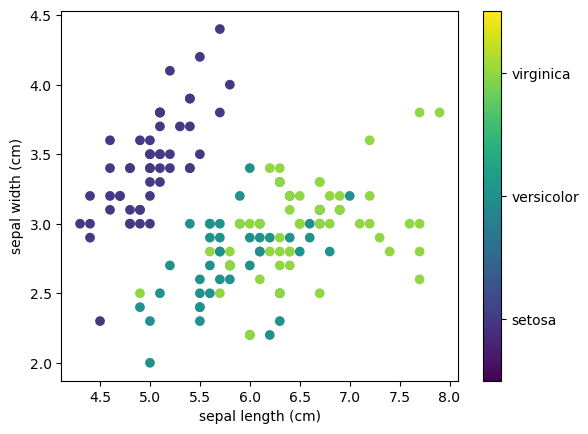

In [7]:
# Visualise some of the pairs of datasets 
# you can use the following formatter to add a colorbar with each color associated to specific target name
# this formatter will label the colorbar with the correct target names
from matplotlib import pyplot as plt 

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

# First and second feature
a = plt.scatter(iris.data[:, 0],iris.data[:, 1], c=iris.target)   # fill with data of interest 
plt.colorbar(a, ticks=[0, 1, 2], format=formatter)   # add a colorbar 
# Same with different colors
#plt.colorbar(a, ticks=[0, 1, 2], format=formatter, cmap=plt.cm.get_cmap('Blues', 3)) 
plt.clim(-0.5, 2.5) # Limits the range of the color-bar between -0.5 and 2.5 
# add labels using the dictionnary entries 
plt.xlabel(iris.feature_names[0]) # add your x-label
plt.ylabel(iris.feature_names[1]);  # add y label 

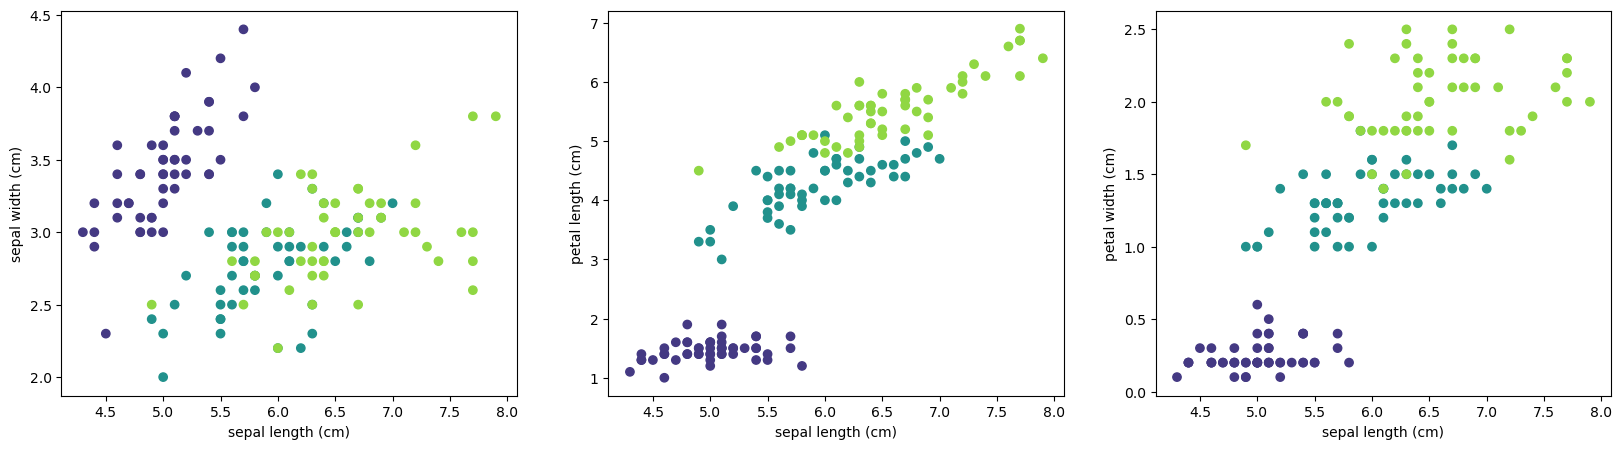

In [8]:
# We can look at the 3 pairs 0-1, 0-2, 0-3 
f, ax = plt.subplots(ncols=3, figsize=(20,5))
for i in range(3): 
    a = ax[i].scatter(iris.data[:, 0],iris.data[:, i+1], c=iris.target)   # fill with data of interest 
    formatter = plt.FuncFormatter(lambda j, *args: iris.target_names[int(j)])
    #plt.colorbar(a, ticks=[0, 1, 2], format=formatter, ax=ax[i])   # add a colorbar 
# Same with different colors
#    plt.colorbar(a, ticks=[0, 1, 2], format=formatter, cmap=plt.cm.get_cmap('viridis', 3), ax=ax[i]) 
    a.set_clim(-0.5, 2.5) # Limits the range of the color-bar between -0.5 and 2.5 
# add labels using the dictionnary entries 
    ax[i].set_xlabel(iris.feature_names[0]) # add your x-label
    ax[i].set_ylabel(iris.feature_names[i+1]);  # add y label 

#### Exercise Gaussian naive Bayes applied to Iris: 

- Apply the naive Bayes approach to the Iris data set. For this use `from sklearn.naive_bayes import GaussianNB`
- Look at the fitted values of the parameters (remember that the parameter' names end with an underscore "_"). What do they mean?
- For each label, create a figure withe data points colored based on the predicted proba of being in a given class / to have a given label. Tip: call the `predict_proba()` method to calculate the probabilities. 
  
- The analysis workflow is similar to the one used for regression. You may however benefit from knowing some useful tips to speed up the work:

    - To split your sample into a training and test set, you can use the method `train_test_split` from `sklearn.model_selection` (Checkout the help of the function to find out the syntax; See [sklearn online help](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) for an overview of available classes, methods, ... available for evaluating estimator performances through cross validation and tuning hyper parameters)
    - Calculate the fraction of predicted labels that match their true values using the `accuracy_score` method available in `sklearn.metrics`. What does this score quantifies? Try to evaluate the score for each label. 

In [9]:
# Solution 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB   # Choose model class 
from sklearn.metrics import accuracy_score 
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris,random_state=1, test_size=0.25) # test_size is by default 0.25
# Note that the "priors" of the class is a parameter ; by default, same proba for each class 
model = GaussianNB() # 2. instantiate model. 
model.fit(X_train, y_train) # 3. fit model to data
y_model = model.predict(X_test) # 4. predict on new data
# Calculate an accuracy score for the test set 
accuracy_score(y_test, y_model)

0.9736842105263158

In [10]:
import numpy as np 

In [11]:
# Let's have a deeper look to the score reported. 
# What fraction of label 0/1/2 are correctly recovered? 
# A possibility is to do this with the function "where" 
frac = np.zeros(3) # Array to save the results
n_lab = np.zeros(3) # Array to save the number of element for each label
for i in range(3): 
    idx_true = np.where(y_test == i) 
    n_lab[i] = len(idx_true[0])
    idx_predict = np.where(y_model[idx_true] == i)
    frac[i] = float(len(idx_predict[0])) / len(idx_true[0])
    print('Fraction of recovered labels for label %i = %.2f'%(i, frac[i]))

Fraction of recovered labels for label 0 = 1.00
Fraction of recovered labels for label 1 = 0.94
Fraction of recovered labels for label 2 = 1.00


In [12]:
weight = n_lab / n_lab.sum() # fraction of positive instances for each label
print('Total Average %.3f' % frac.mean() )
print('Weighted average %.3f' % (frac * weight).sum() )

Total Average 0.979
Weighted average 0.974


The reported score (accuracy ; `accuracy_score(y_test, y_model)`) is the weighted average af the scores for each label. 

In [13]:
# A visual check of the fractions given above
y_test, y_model

(array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0]),
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0]))

In [14]:
# Looking at the fitted model parameters (what are they? check out the help of GaussianNB)
model.theta_, model.var_

(array([[4.94594595, 3.35675676, 1.46756757, 0.23513514],
        [5.96470588, 2.74411765, 4.23529412, 1.30882353],
        [6.51707317, 2.95853659, 5.52926829, 2.00243902]]),
 array([[0.10842951, 0.13434624, 0.02651571, 0.01146823],
        [0.28875433, 0.10658305, 0.22346021, 0.04139274],
        [0.36775729, 0.09754908, 0.31280191, 0.07877454]]))

In [15]:
model.theta_

array([[4.94594595, 3.35675676, 1.46756757, 0.23513514],
       [5.96470588, 2.74411765, 4.23529412, 1.30882353],
       [6.51707317, 2.95853659, 5.52926829, 2.00243902]])

Each row corresponds to a label and each column to a feature. 

In [16]:
probas_test = model.predict_proba(X_test)
probas_test

array([[1.00000000e+000, 1.45222626e-017, 8.89384389e-024],
       [5.09981050e-032, 9.99999222e-001, 7.77945362e-007],
       [4.32830671e-101, 9.72679167e-001, 2.73208326e-002],
       [1.00000000e+000, 1.06261966e-015, 2.10795947e-022],
       [2.12952227e-272, 1.77335273e-009, 9.99999998e-001],
       [3.12379408e-123, 5.04162130e-001, 4.95837870e-001],
       [1.17143228e-195, 7.43947100e-007, 9.99999256e-001],
       [1.00000000e+000, 1.00965721e-011, 2.09768621e-018],
       [1.00000000e+000, 3.65082991e-016, 2.94913557e-023],
       [2.93821653e-234, 2.11616765e-008, 9.99999979e-001],
       [7.55136626e-084, 9.99488916e-001, 5.11084349e-004],
       [1.00000000e+000, 2.31886033e-013, 5.94346293e-020],
       [1.55508946e-235, 2.57895372e-007, 9.99999742e-001],
       [6.95090262e-109, 8.90046011e-001, 1.09953989e-001],
       [1.18501213e-107, 9.65832377e-001, 3.41676229e-002],
       [1.00000000e+000, 7.28094251e-018, 4.32307624e-025],
       [3.84719458e-072, 9.99893926e-001

(150, 3)


Text(0, 0.5, 'sepal width (cm)')

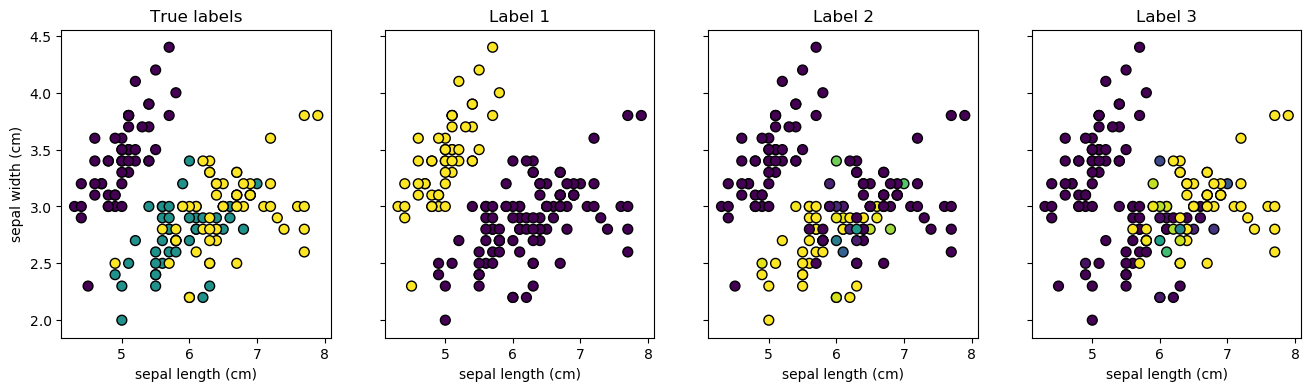

In [17]:
# Visualising the output is a bit tricky due to the 4D ... - Here are some trade-off 
# A possibility is to color the points based on their probability to be in each class 
probas = model.predict_proba(X_iris)
print(probas.shape)  
f, ax = plt.subplots(figsize=(16,4), ncols=4, sharey=True)
for i in range(3): # color for each of the 3 labels 
    ax[i+1].scatter(X_iris[:, 0], X_iris[:, 1], c=probas[:, i], edgecolors='k', s=50)
    ax[i+1].set_title('Label %i'%(i+1))
ax[0].scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, edgecolors='k', s=50)
ax[0].set_title('True labels')
[ax[k].set_xlabel(iris.feature_names[0]) for k in range(4)]; 
ax[0].set_ylabel(iris.feature_names[1])

We see that the feature 0 is well recovered but that for feature 1 and 2 there are some overlaps of the PDF illustrated by the darker colors on the regions where the object classes overlap in the true labels). The fact that the attribution to each class is not "random" arises because of the other dimensions ... 

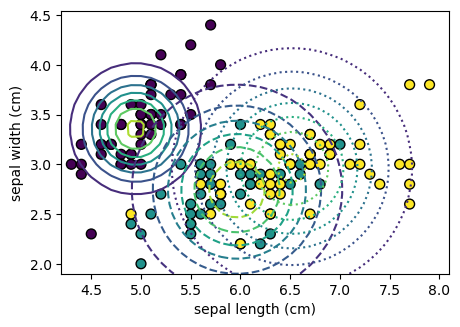

In [18]:
# Another possibility to visualise it to use the output parameters and overlay bivariate distribution 
# Note here that there is no covariance between features.
import scipy.stats
import numpy as np
x_min, x_max = X_iris[:, 0].min() - 0.1, X_iris[:, 0].max() + 0.1
y_min, y_max = X_iris[:, 1].min() - 0.1, X_iris[:, 1].max() + 0.1
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.1),
                   np.arange(y_min, y_max, 0.1))
# I now create a 3D array containing the X and Y coordinates
pos = np.zeros(X.shape + (2,))   
pos[:, :, 0] = X
pos[:, :, 1] = Y
# Center of the multivariate 
# Isotropic bivariate distribution
theta0, theta1 = model.theta_[:, 0] ,model.theta_[:, 1] # centers of the PDF for labels features 0, 1 (3 labels)
var0, var1 = model.var_[:, 0] ,model.var_[:, 1] 
f, ax = plt.subplots(figsize=(5,3.5), ncols=1)
ls = ['solid', 'dashed', 'dotted']
ax.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, edgecolors='k', s=50)
for i in range(3): 
    n_2d = scipy.stats.multivariate_normal(mean=[theta0[i], theta1[i]], cov=[[var0[i], 0], [0, var0[i]]])
    ax.contour(X, Y, n_2d.pdf(pos), linestyles=ls[i])
ax.set_xlabel(iris.feature_names[0]) 
ax.set_ylabel(iris.feature_names[1])
ax.set_aspect('equal')

## Naive Bayes classification of RR Lyrae

Use Naive Bayes to separate RR Lyrae from non variable main sequence stars. Here we have a 4-D $X$ and we are going to take them 1-D at a time to see how much improvement comes from adding each new dimension of $X$.

**In practice** 

1) Import the data set using `from astroML.datasets import fetch_rrlyrae_combined`. The data sets contains 4 colors: 'u-g', 'g-r', 'r-i', 'i-z'. Re-organise the columns to have 'g-r', 'u-g', 'r-i', 'i-z'. Visualise 

1b) Write a function that calculates the FP, TP, FN, TN based on input vectors of predicted labels (y_predict), and ground truth labels (y_test)

2) Train a Naive Bayes using 1, 2, 3, 4 colors. For each case, calculate the "completeness" and what is the "contamination".  

3) (For the 2 color case) Calculate Decision Boundary between RR-Lyrae and other non variable stars: A decision boundary between 2 classes is the set of feature values at which each class is equally likely. 

In [19]:
from astroML.datasets import fetch_rrlyrae_combined 
from sklearn.naive_bayes import GaussianNB

In [20]:
X, y = fetch_rrlyrae_combined()
X.shape

(93141, 4)

In [21]:
X, y = fetch_rrlyrae_combined() # X is a 4-D color-color-color-color space
# Look the data format and re-organise the columns order for better 1 color classification
print(X.shape, y.shape)
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(93141, 4) (93141,)


((69855, 4), (23286, 4), (69855,), (23286,))

Text(0, 0.5, 'g-r')

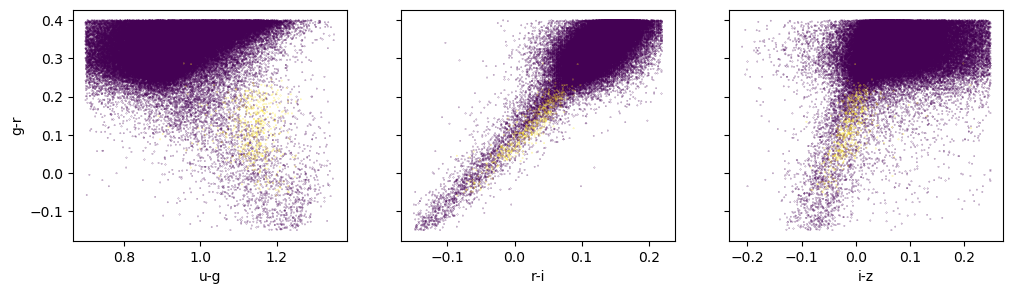

In [22]:
# A simple but limited visualisation of the data 
f, ax = plt.subplots(ncols=3, figsize = (12, 3), sharey=True)
xlab = ['g-r', 'u-g', 'r-i', 'i-z']

for i in range(3): 
    ax[i].scatter(X[:, i+1], X[:,0], c=y, marker='.', s=0.1, cmap='viridis')
    ax[i].set_xlabel(xlab[i+1])
ax[0].set_ylabel('g-r')
   

In [23]:
# Visualisation with pandas pairplot ... Quite computationally demanding ! -> avoid it 
import pandas as pd
import seaborn as sns
data_4df = np.column_stack((X, y))
df = pd.DataFrame(data_4df, columns=['g-r', 'u-g', 'r-i', 'i-z', 'class'])

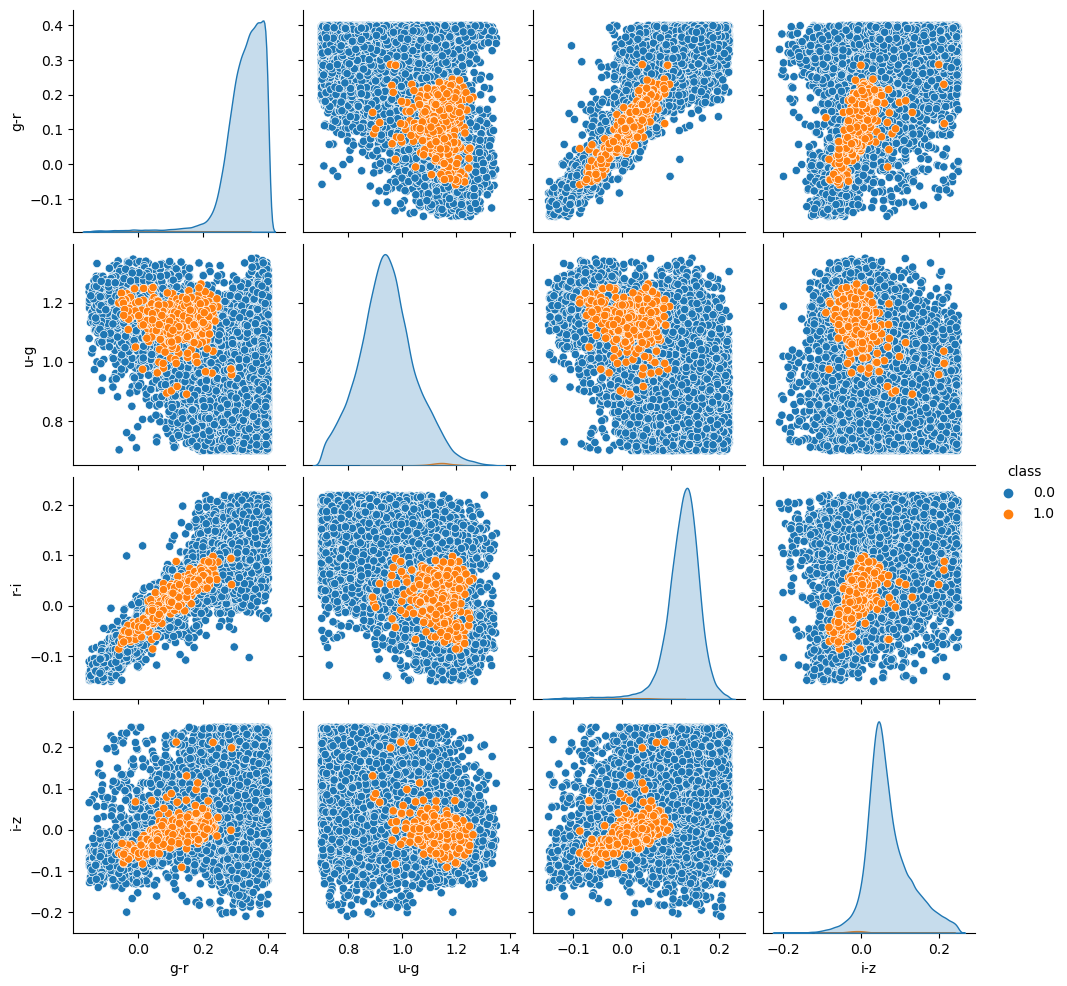

In [24]:
# this is a very demanding plot ! 
sns.pairplot(df, hue='class')

In [25]:
# Write up a generic function that calculate FP, TP, FN, TN based on input vectors (y_predict, y_test)
def calc_confusion_mtx(y_predict, y_test):
    Ntot = len(y_test)
    NP_tot = np.sum(y_test) # total number of positives in the test  
    TP = np.sum(y_test[y_predict == 1])
    TN = len(np.where(y_test[y_predict == 0] == 0)[0])
    FP = len(np.where(y_test[y_predict == 1] == 0)[0])  # 
    FN = len(np.where(y_test[y_predict == 0] == 1)[0])
    return TP, TN, FP, FN, NP_tot

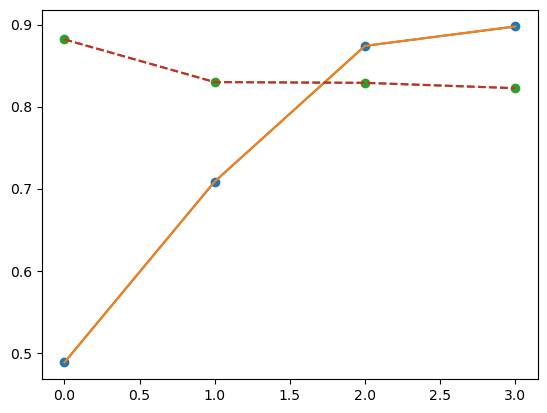

In [26]:
from astroML.utils import completeness_contamination
cpl = []
contam = [] 
cpl2, contam2 = [], [] # arrays to save those using  completeness_contamination()
classifiers = []  # list to save the classifier for each pair of color 
predictions = []  # list to save the associated predictions

N_tot = len(y)
N_star = np.sum(y == 0)
N_RRLyrae = N_tot - N_star
N_train = len(y_train)
N_test = len(y_test)
N_RRLyrae_test = int(np.sum(y_test))

for n_colors in range(1, 5):
    model = GaussianNB() # 2. instantiate model
    model.fit(X_train[:, :n_colors], y_train) # 3. fit model to data
    y_predict = model.predict(X_test[:, :n_colors]) # 4. predict on new data
    
    # Calculate TP, TN, FP, FN 
    TP, TN, FP, FN, NP_tot = calc_confusion_mtx(y_predict, y_test)
    completeness = TP / (TP + FN)
    contamination = FP / (TP + FP)
    cpl.append(completeness)
    contam.append(contamination)
    
    # Verification using a astroML buitl-in function
    cp2, cnt2 = completeness_contamination(y_predict, y_test)
    cpl2.append(cp2)
    contam2.append(cnt2) 
    
    # Calculate an accuracy score for the test set 
#    cpl.append(accuracy_score(y_test, y_model) ) 
    classifiers.append(model)
    predictions.append(y_predict)

plt.plot(cpl, marker='o')
plt.plot(cpl2) # To check that the predictions are the same w. scikit-learn
plt.plot(np.array(contam), marker='o', ls='--')
plt.plot(contam2, ls='--')  # To check that the predictions are the same w. scikit-learn

In [27]:
#------------------------------------------------------------
# Compute the decision boundary for the 2 pair of colors
model = classifiers[1]  # This is the classification based on 2 colors: (g-r) and (u-g)

xlim = (-0.15, 0.4)  # feature 2 (u-g)
ylim = (0.7, 1.35)   # feature 0 (g-r) 

# The predict_proba method takes as input an X-like array with shape "nsample, nfeatures"
# Here we will calculate the proba over a grid of points 
# Let's first use meshgrid to make the grid 
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 81),
                     np.linspace(ylim[0], ylim[1], 71))

# Now we reshape the grid to have the format needed for X 
X_grid = np.column_stack([xx.ravel(), yy.ravel()])

P_grid = model.predict_proba(X_grid)
print(P_grid.shape)
# Now we need to reshape the predicted probabilities to be able to plot using our X-Y Meshgrids
# We are interested in the RR-lyrae which is the class in column #1 
P_grid = P_grid[:, 1].reshape(xx.shape).copy()  
print(P_grid.shape)

(5751, 2)
(71, 81)


In [28]:
P_grid.max(), P_grid.min()

(0.9999999435698415, 1.1952175793124388e-18)

In [29]:
# How to easily make a tuple with (left, right, bottom, top) bounding boxes 
xlim+ylim

(-0.15, 0.4, 0.7, 1.35)

Text(0, 0.5, '$u-g$')

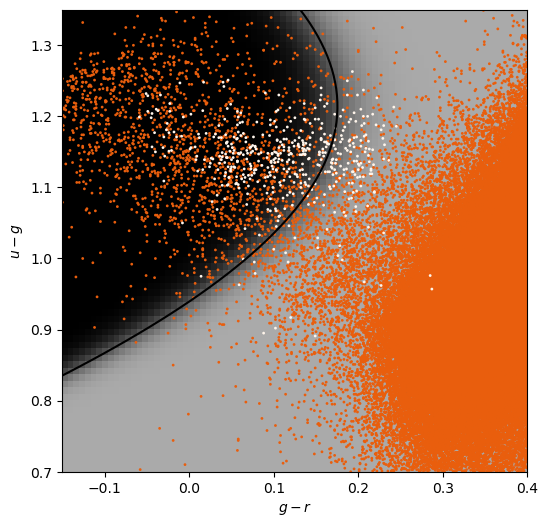

In [30]:
# plot the decision boundary plot 
f, ax = plt.subplots(figsize=(6,6))

# To show the change of probabilities coded based on the colors... 
im = ax.imshow(P_grid, origin='lower', aspect='auto', cmap=plt.cm.binary, extent=xlim + ylim) 
# Note in the above command the extent argument that enables to change "pixels" into the "magnitude" limits
im.set_clim(-0.5, 1.0)
# Plot the decision boundary ! 
ax.contour(xx, yy, P_grid, [0.5], colors='k')

# Now, overlay the data points ... 
im = ax.scatter(X[:, 0], X[:, 1], c=y[:],
                s=4, lw=0, cmap=plt.cm.Oranges_r)
im.set_clim(-0.5, 1.0)

# And finally fine tune the axis display 
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$g-r$')
ax.set_ylabel('$u-g$')

There is room to make even nicer plots ... You may consider it when you need to share your results. 

value of u-g for index 54 = 1.2014285714285715
(array([47]),)


Text(0.5, 0, 'g-r')

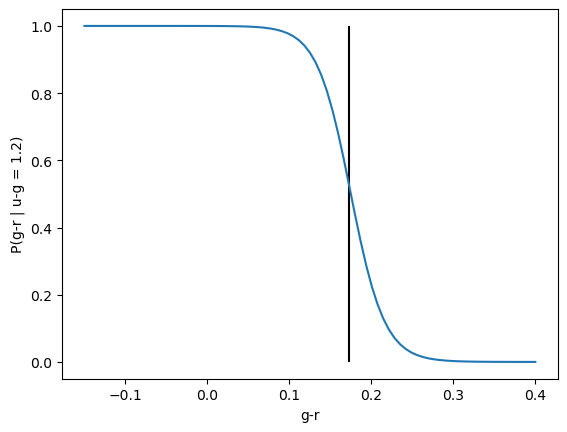

In [31]:
# Example of 1D slice of this figure / of the proba 
# Let's say that we want to show P(g-r | u-g = 1.2)
# This is for index 54 
print('value of u-g for index 54 =', yy[54, 0])
plt.plot(xx[54, :], P_grid[54, :]) 
boundary_1d = np.where((P_grid[54, :]>0.44) & (P_grid[54, :]<0.56))
print(boundary_1d)
plt.vlines(xx[54, 47], 0 ,1)
plt.ylabel('P(g-r | u-g = 1.2)')
plt.xlabel('g-r')